In [1]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #benzerlik skoru
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
import chardet
file = "PBL5recommendationdata.csv"

with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [2]:
data = pd.read_csv("PBL5recommendationdata.csv" , encoding = "ISO-8859-5" )


c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (20,33,73,106,158) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [7]:
x = data.isnull().sum() > 0
x

# boş sütuna sahip dataları belirledim 

Customers.id                      False
Customers.fname                   False
Customers.lname                   False
Customers.company                  True
Customers.create_date             False
Customers.status                   True
Customers.mailing                  True
Customers.reminders                True
Customers.tax_exempt               True
Customers.account_id               True
Customers.sales_rep                True
Customers.rewards                  True
Customers.profile_id               True
Customers.last_modified           False
Customers.customer_type            True
Orders.id                         False
Orders.customer_id                False
Orders.fname                      False
Orders.lname                      False
Orders.company                     True
Orders.order_number               False
Orders.reorder_id                  True
Orders.external_source             True
Orders.external_id                 True
Orders.currency                   False


In [8]:
data2= pd.DataFrame(x).reset_index()
data2.columns =["ColumnName", "counts",]
data2

,ColumnName,counts
0,Customers.id,False
1,Customers.fname,False
2,Customers.lname,False
3,Customers.company,True
4,Customers.create_date,False
5,Customers.status,True
6,Customers.mailing,True
7,Customers.reminders,True
8,Customers.tax_exempt,True
9,Customers.account_id,True


In [9]:
a = 0
for i in range(181):
    if data2.iloc[i,1] == True :
        a = data2.iloc[i,0]
        del data[a]
        
# boş satıra sahip sütunları dataframe'den çıkardım

In [10]:
data

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.total,Orders.status,Orders.placed_date,Order_Items.id,Order_Items.parent,Order_Items.product_name,Order_Items.qty,Order_Items.price
0,797,Christy,Dill,1426018724,1437764306,3758,797,Christy,Dill,3758,USD,57.20,64.29,1,1426019099,5284,3758,"Basic Rollators, Green",1,57.20
1,3,John,Smith,1386089139,1437764354,23,3,John,Smith,23,USD,20.00,29.99,1,1386090455,31,23,"Urinary Drain Bags,0.000",4,5.00
2,3,John,Smith,1386089139,1437764354,9531,3,John,Smith,9531,USD,68.78,78.73,3,1449603652,11655,9531,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78
3,4,James,Anderson,1386780263,1437762646,29,4,James,Anderson,29,USD,19.56,29.55,1,1386780263,1816,29,Basket for 2-Button Walkers,1,19.56
4,5,Abraham,Pollak,1386861599,1437764316,30,5,Abraham,Pollak,30,USD,36.05,46.00,1,1386861599,40,30,Tens Units,1,36.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,3730,Nora,Fontana,1463408698,1463408698,17421,3730,Nora,Fontana,17421,USD,14.85,16.06,0,1463408854,20186,17421,"Medline Emesis/Barf Bags, throw up bags, Blue ...",1,14.85
4190,3732,Kennithe,Tecora,1463412756,1463412756,17425,3732,Kennithe,Tecora,17425,USD,39.99,39.99,0,1463412757,20190,17425,Medline Home Bed Assist Bar,1,39.99
4191,3733,Tinna,Randall,1463413245,1463413245,17426,3733,Tinna,Randall,17426,USD,1099.00,989.10,5,1463413246,20191,17426,Spitfire EX Travel 4-Wheel Mobility Scooter 21...,1,1099.00
4192,3735,HALIMAH,SHAHID,1463416687,1463416687,17431,3735,HALIMAH,SHAHID,17431,USD,129.99,129.99,0,1463416694,20196,17431,"Standard Bariatric Heavy Duty Rollator, Burgun...",1,129.99


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customers.id              4194 non-null   int64  
 1   Customers.fname           4194 non-null   object 
 2   Customers.lname           4194 non-null   object 
 3   Customers.create_date     4194 non-null   int64  
 4   Customers.last_modified   4194 non-null   int64  
 5   Orders.id                 4194 non-null   int64  
 6   Orders.customer_id        4194 non-null   int64  
 7   Orders.fname              4194 non-null   object 
 8   Orders.lname              4194 non-null   object 
 9   Orders.order_number       4194 non-null   object 
 10  Orders.currency           4194 non-null   object 
 11  Orders.subtotal           4194 non-null   float64
 12  Orders.total              4194 non-null   float64
 13  Orders.status             4194 non-null   int64  
 14  Orders.p

In [12]:
data["Customers.id"].nunique()

#3055 farklı müşteri var

3054

# Total Spending

customer ID seçme sebebi:
    
isim soyisim seçersem unique bir değer olmaz o yüzden databaselerde de __primary key__ olan customerID'yi seçmiş oldum

Eğer yönetici clustering sonucu kümelenmiş kişilerin isim ve soyisimlerini öğrenmek isterse ana databaseden isim ve soyisimi öğrenebilir customerID'yi çağırarak.

In [13]:
data_cus1 = data.groupby("Customers.id")["Orders.total"].sum()
data_cus1

Customers.id
3       108.72
4        29.55
5       124.99
7        49.14
8        69.70
         ...  
3730     16.06
3732     39.99
3733    989.10
3735    129.99
3736     24.54
Name: Orders.total, Length: 3054, dtype: float64

In [14]:
data_cus1= pd.DataFrame(data_cus1).reset_index()
data_cus1.columns =["Customers.id", "Orders.total"]
data_cus1

,Customers.id,Orders.total
0,3,108.72
1,4,29.55
2,5,124.99
3,7,49.14
4,8,69.70
...,...,...
3049,3730,16.06
3050,3732,39.99
3051,3733,989.10
3052,3735,129.99


In [15]:
data_cus1['Customers.id'] = data_cus1['Customers.id'].astype("category")

In [16]:
data_cus1_dummy = pd.get_dummies(data_cus1 , drop_first = True)

number of cluster 2, silhouette 0.9649447784518184
number of cluster 3, silhouette 0.9463294785461607
number of cluster 4, silhouette 0.8735516511556453
number of cluster 5, silhouette 0.8735773005232361
number of cluster 6, silhouette 0.8140619352164975
number of cluster 7, silhouette 0.7831396441691932
number of cluster 8, silhouette 0.6929337021212848
number of cluster 9, silhouette 0.6375511000625809
number of cluster 10, silhouette 0.6375504033628784


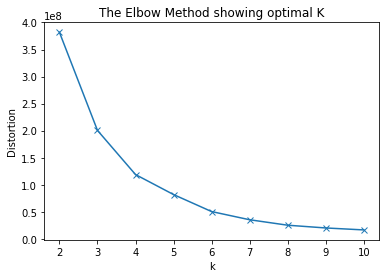

In [17]:

def cluster(x,clusters):
    allscore=[]
    allclusters=[]
    sum_of_squared_distances = []
    x=x
    for i in np.arange(1,clusters):

          i+=1
          model=KMeans(n_clusters=i)
          pred=model.fit_predict(x)
          s_score = silhouette_score(x,pred)
          score=silhouette_score(x,pred)
          print("number of cluster {}, silhouette {}".format(i,score))
          allscore.append(s_score)
          allclusters.append(i)
          sum_of_squared_distances.append(model.inertia_)

    plt.plot(allclusters,sum_of_squared_distances, marker='x')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing optimal K')
    plt.show()
cluster(data_cus1_dummy,10)

In [18]:
model = KMeans(n_clusters = 4)

model = model.fit(data_cus1_dummy)

pred = model.predict(data_cus1_dummy)

No handles with labels found to put in legend.


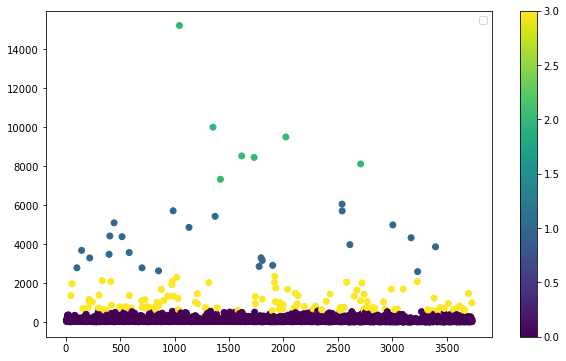

In [19]:
plt.figure(figsize = (10,6))  
plt.scatter(data_cus1["Customers.id"],data_cus1["Orders.total"] , c = pred)
plt.legend()
plt.colorbar()
plt.show() 

# Buying Frequency

In [20]:
data_cus2= pd.DataFrame(data['Customers.id'].value_counts()).reset_index()
data_cus2.columns =["Customers.id", "frequency",]
data_cus2

,Customers.id,frequency
0,1043,41
1,1371,35
2,1616,27
3,581,25
4,515,25
...,...,...
3049,1411,1
3050,1412,1
3051,1413,1
3052,1414,1


In [21]:
data_cus2['Customers.id'] = data_cus2['Customers.id'].astype("category")

In [22]:
data_cus2_dummy = pd.get_dummies(data_cus2 , drop_first = True)

number of cluster 2, silhouette 0.8856315653166198
number of cluster 3, silhouette 0.6716381187206791
number of cluster 4, silhouette 0.5194725165609165
number of cluster 5, silhouette 0.27515119005309413
number of cluster 6, silhouette 0.23914569744018904
number of cluster 7, silhouette 0.18401362621426504
number of cluster 8, silhouette 0.18694095393795465
number of cluster 9, silhouette 0.18136613384444222
number of cluster 10, silhouette 0.0315241468236099


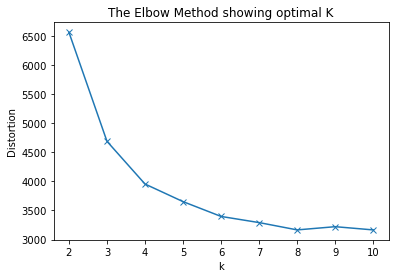

In [23]:
cluster(data_cus2_dummy,10)

In [24]:
model1 = KMeans(n_clusters = 4)

model1 = model1.fit(data_cus2_dummy)

pred1 = model1.predict(data_cus2_dummy)

No handles with labels found to put in legend.


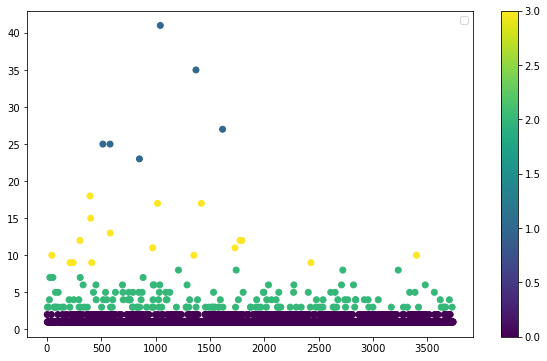

In [25]:
plt.figure(figsize = (10,6))  
plt.scatter(data_cus2["Customers.id"],data_cus2["frequency"] , c = pred1)
plt.legend()
plt.colorbar()
plt.show() 

# Recency

In [26]:
data_cus3 = data[['Customers.id','Customers.create_date']]

In [27]:
data_cus3.shape

(4194, 2)

In [28]:
data_cus3['Customers.id'] = data_cus3['Customers.id'].astype("category")

In [29]:
data_cus3_dummy = pd.get_dummies(data_cus3 , drop_first = True)

number of cluster 2, silhouette 0.6536653081770389
number of cluster 3, silhouette 0.6361052648223648
number of cluster 4, silhouette 0.6262681288152186
number of cluster 5, silhouette 0.5770159342317068
number of cluster 6, silhouette 0.5768333560112647
number of cluster 7, silhouette 0.5785452838906282
number of cluster 8, silhouette 0.5648296705773057
number of cluster 9, silhouette 0.5706705220365965
number of cluster 10, silhouette 0.5711730228832471


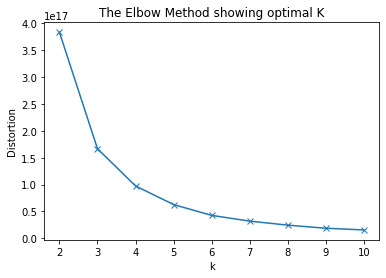

In [30]:
cluster(data_cus3_dummy,10)

In [31]:
model2 = KMeans(n_clusters = 4)

model2 = model2.fit(data_cus3_dummy)

pred2 = model2.predict(data_cus3_dummy)

No handles with labels found to put in legend.


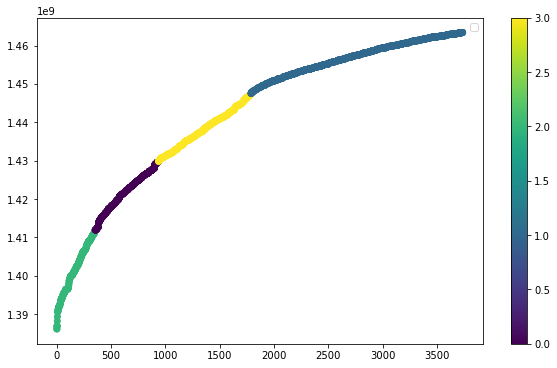

In [32]:
plt.figure(figsize = (10,6))  
plt.scatter(data_cus3["Customers.id"],data_cus3["Customers.create_date"] , c = pred2)
plt.legend()
plt.colorbar()
plt.show() 

# Final Data

In [76]:
data_final = data["Customers.id"]

data_final= pd.DataFrame(data_final).reset_index()
data_final.columns =["index","Customers.id"]
del data_final["index"]

data_final['clust(recency)'] = pred2

data_final.shape

(4194, 2)

In [77]:
data_final.drop_duplicates(inplace=True)
data_final.dropna(inplace=True)


data_final['clust(frequency)'] = pred1

In [78]:
data_final['clust(total_spend)'] = pred


Artık müşterimiz istediği clusta ait kişilerin customer_id'sine bağlı olarak istediği işlemi yapabilir 

Artık database'e bu tabloyu yüklenebilir

In [79]:
data_final

,Customers.id,clust(recency),clust(frequency),clust(total_spend)
0,797,0,1,0
1,3,2,1,0
3,4,2,1,0
4,5,2,1,0
7,7,2,1,0
...,...,...,...,...
4189,3730,1,0,0
4190,3732,1,0,0
4191,3733,1,0,3
4192,3735,1,0,0
